In [43]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, sem, tstd
import pandas as pd
from matplotlib import pyplot as plt

## Retrive data from the plaintext experiment

In [26]:
df = pd.read_csv("emissions_plaintext.csv", usecols=['emissions', 'energy_consumed', 'duration'])
plaintext_emissions = df['emissions'].to_list()
plaintext_emissions_err = np.std(plaintext_emissions)
plaintext_energy = df['energy_consumed'].to_list()
plaintext_energy_err = np.std(plaintext_energy)

## Retrive data from the SWiSSSE experiment

In [27]:
df = pd.read_csv("emissions_swissse.csv", usecols=['emissions', 'energy_consumed', 'duration'])
swissse_emissions = df['emissions'].to_list()
swissse_emissions_err = np.std(swissse_emissions)
swissse_energy = df['energy_consumed'].to_list()
swissse_energy_err = np.std(swissse_energy)

## Perform Mann-Whitney U test

In order to test the significance of the difference between the data we will use Mann-Whitney U Test.

H0: The distributions of both samples are equal.

H1: The distributions of both samples are not equal.

Alpha: 0.05

In [28]:
stats, pvalue = mannwhitneyu(plaintext_emissions, swissse_emissions, alternative='less', method='exact')

alpha = 0.05

if pvalue < alpha:
    print("Reject null hypothesis since p-value: " + str(pvalue) + " < " + str(alpha))
else:
    print("Accept null hypothesis since p-value: " + str(pvalue) + " > " + str(alpha))

Reject null hypothesis since p-value: 0.0010822510822510823 < 0.05


## Generate diagrams

#### Emissions of plaintext search

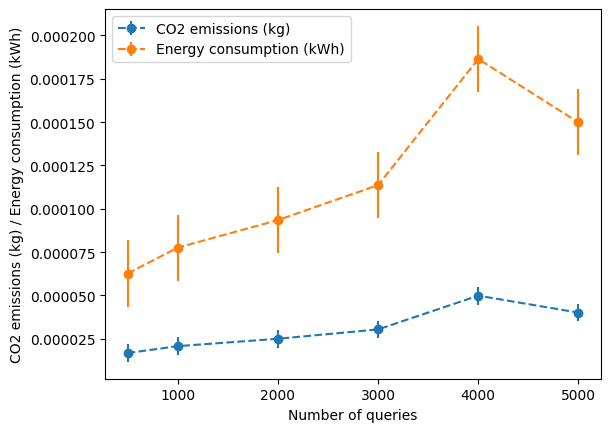

In [29]:
number_of_queries = [500, 1000, 2000, 3000, 4000, 5000]

fig, ax = plt.subplots()
ax.errorbar(number_of_queries, plaintext_emissions, yerr=sem(plaintext_emissions), fmt='o--', label='CO2 emissions (kg)')
ax.errorbar(number_of_queries, plaintext_energy, yerr=sem(plaintext_energy), fmt='o--', label='Energy consumption (kWh)')

ax.legend(loc="upper left")
ax.set(xlabel='Number of queries', ylabel='CO2 emissions (kg) / Energy consumption (kWh)')
fig.savefig("diagrams/plaintext_emissions.png", bbox_inches="tight")
plt.show()


#### Emissions of SWiSSSE search

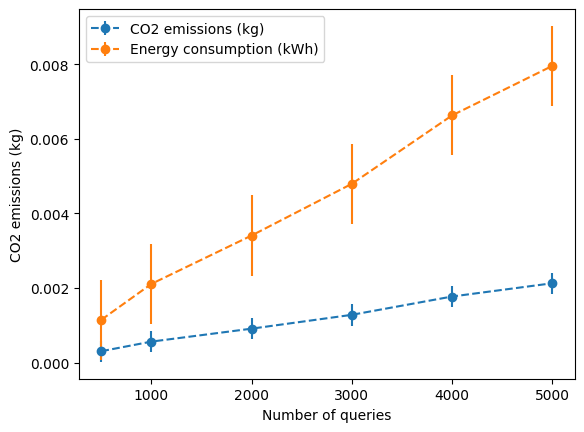

In [30]:
# number_of_queries = [10, 100, 1000, 2000, 5000]

fig, ax = plt.subplots()
ax.errorbar(number_of_queries, swissse_emissions, yerr=sem(swissse_emissions), fmt='o--', label='CO2 emissions (kg)')
ax.errorbar(number_of_queries, swissse_energy, yerr=sem(swissse_energy), fmt='o--', label='Energy consumption (kWh)')
ax.legend(loc="upper left")
ax.set(xlabel='Number of queries', ylabel='CO2 emissions (kg)')
fig.savefig("diagrams/swissse_emissions.png", bbox_inches="tight")
plt.show()


#### Comparison of emissions

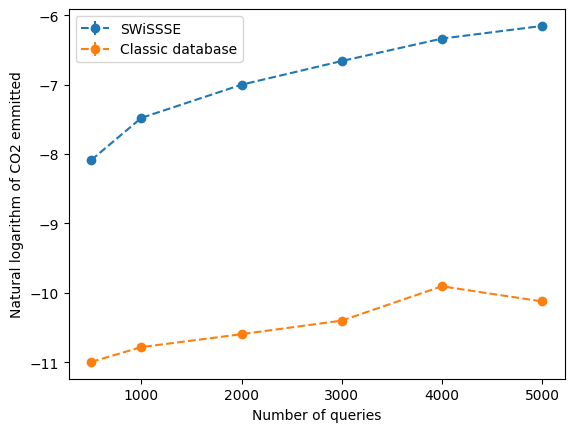

In [31]:
# number_of_queries = [10, 100, 1000, 2000, 5000]

fig, ax = plt.subplots()
ax.errorbar(number_of_queries, np.log(swissse_emissions), yerr=sem(swissse_emissions), fmt='o--', label='SWiSSSE')
ax.errorbar(number_of_queries, np.log(plaintext_emissions), yerr=sem(plaintext_emissions), fmt='o--', label='Classic database')
ax.legend(loc="upper left")
ax.set(xlabel='Number of queries', ylabel='Natural logarithm of CO2 emmitted')
fig.savefig("diagrams/comparison_emissions.png", bbox_inches="tight")
plt.show()

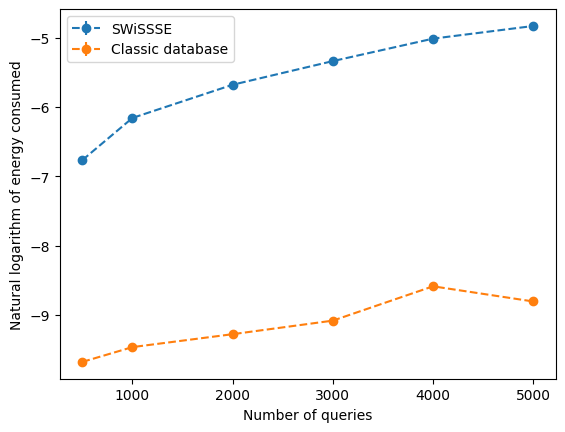

In [32]:
# number_of_queries = [10, 100, 1000, 2000, 5000]

fig, ax = plt.subplots()
ax.errorbar(number_of_queries, np.log(swissse_energy), yerr=sem(swissse_energy), fmt='o--', label='SWiSSSE')
ax.errorbar(number_of_queries, np.log(plaintext_energy), yerr=sem(plaintext_energy), fmt='o--', label='Classic database')
ax.legend(loc="upper left")
ax.set(xlabel='Number of queries', ylabel='Natural logarithm of energy consumed')
fig.savefig("diagrams/comparison_energy.png", bbox_inches="tight")
plt.show()

In [33]:
ratio_energy = [swissse_energy[i] / plaintext_energy[i] for i in range(len(swissse_energy))]
print(ratio_energy)

[18.350533225080326, 27.222347477173777, 36.47385886357023, 42.18888116470851, 35.55348072295637, 53.09395416221349]


### Calculate emissions per query and energy consumption per query

In [34]:
size_db = [1000, 2000, 3000, 4000, 5000]

df = pd.read_csv("emissions_variable_db_size_plaintext.csv", usecols=['emissions', 'energy_consumed', 'duration'])
emissions_plaintext = df['emissions'].to_list()
energy_plaintext = df['energy_consumed'].to_list()
plaintext_per_query_emissions = [emissions_plaintext[i] / 1000 for i in range(len(emissions_plaintext))]
plaintext_per_query_energy = [energy_plaintext[i] / 1000 for i in range(len(energy_plaintext))]

df = pd.read_csv("emissions_variable_db_size_swissse.csv", usecols=['emissions', 'energy_consumed', 'duration'])
emissions_swissse = df['emissions'].to_list()
energy_swissse = df['energy_consumed'].to_list()
swissse_per_query_emissions = [emissions_swissse[i] / 1000 for i in range(len(emissions_swissse))]
swissse_per_query_energy = [energy_swissse[i] / 1000 for i in range(len(energy_swissse))]

[5.305189310594308e-09, 6.111157517211604e-09, 6.726230977013338e-09, 7.124719214028522e-09, 7.753136403579196e-09]
[3.514678038855324e-08, 4.628884335241867e-08, 5.79490785481883e-08, 7.655003607377717e-08, 1.005371241372e-07]
2.584947918713363e-08


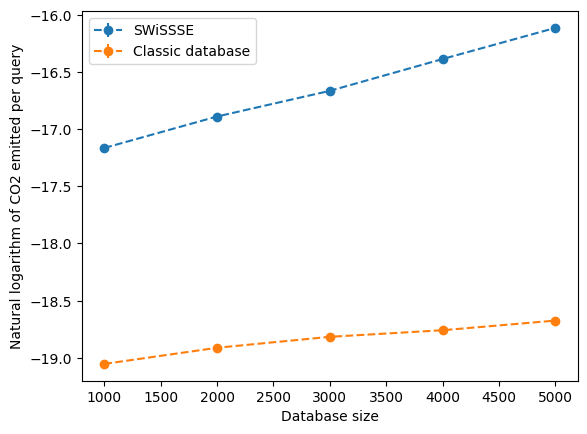

In [49]:
fig, ax = plt.subplots()
print(plaintext_per_query_emissions)
print(swissse_per_query_emissions)
ax.errorbar(size_db, np.log(swissse_per_query_emissions), yerr=tstd(swissse_per_query_emissions), fmt='o--', label='SWiSSSE')
ax.errorbar(size_db, np.log(plaintext_per_query_emissions), yerr=tstd(plaintext_per_query_emissions), fmt='o--', label='Classic database')
ax.legend(loc="upper left")
ax.set(xlabel='Database size', ylabel='Natural logarithm of CO2 emitted per query')
fig.savefig("diagrams/comparison_emissions_db_size.png", bbox_inches="tight")
plt.show()

[1.9823442432215244e-08, 2.2835034179595112e-08, 2.5133326023321463e-08, 2.6622322581957095e-08, 2.8970474787495775e-08]
[1.313299369579e-07, 1.729635207584e-07, 2.1653331395840001e-07, 2.8603790448379997e-07, 3.756683835308e-07]


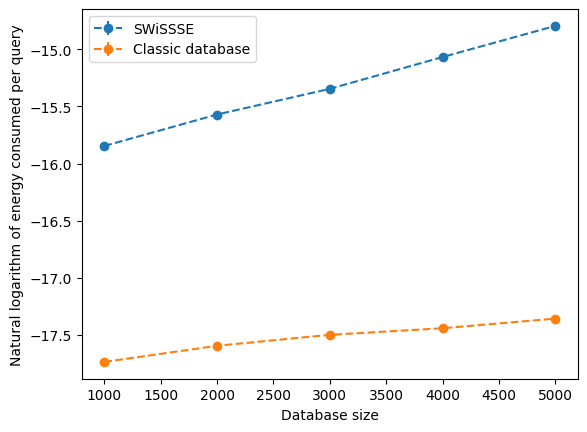

In [45]:
fig, ax = plt.subplots()
ax.errorbar(size_db, np.log(swissse_per_query_energy), yerr=tstd(swissse_per_query_energy), fmt='o--', label='SWiSSSE')
ax.errorbar(size_db, np.log(plaintext_per_query_energy), yerr=sem(plaintext_per_query_energy), fmt='o--', label='Classic database')
print(plaintext_per_query_energy)
print(swissse_per_query_energy)
ax.legend(loc="upper left")
ax.set(xlabel='Database size', ylabel='Natural logarithm of energy consumed per query')
fig.savefig("diagrams/comparison_energy_db_size.png", bbox_inches="tight")
plt.show()

In [50]:
print(plaintext_per_query_energy)
print(plaintext_per_query_emissions)
print()
print(swissse_per_query_energy)
print(swissse_per_query_emissions)

[1.9823442432215244e-08, 2.2835034179595112e-08, 2.5133326023321463e-08, 2.6622322581957095e-08, 2.8970474787495775e-08]
[5.305189310594308e-09, 6.111157517211604e-09, 6.726230977013338e-09, 7.124719214028522e-09, 7.753136403579196e-09]

[1.313299369579e-07, 1.729635207584e-07, 2.1653331395840001e-07, 2.8603790448379997e-07, 3.756683835308e-07]
[3.514678038855324e-08, 4.628884335241867e-08, 5.79490785481883e-08, 7.655003607377717e-08, 1.005371241372e-07]
